# Blumenfarben

---

## Importe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Laden Sie das Iris-Datenset

In [2]:
data_train = pd.read_csv('iris.csv')

- Die 3 zu erkennen Klassifikationsklassen werden in die numerischen Werte 0, 1 bzw. 2 umgewandelt.

In [3]:
data_train.loc[data_train['species']=='Iris-setosa', 'species']=0
data_train.loc[data_train['species']=='Iris-versicolor', 'species']=1
data_train.loc[data_train['species']=='Iris-virginica', 'species']=2
data_train = data_train.apply(pd.to_numeric)

- Das eingelesene Datenset wird als Matrix dargestellt

In [4]:
data_train_array = data_train.values

- Zur Sicherstellung der Reproduzierbarkeit der Ergebnisse setzen wir random.seed auf einen festen Wert, z. B. 17

In [5]:
np.random.seed(17)

- Trainingsdaten: 80%
- Testdaten: 20%
- X ist ein Vektor

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_train_array[:, :4],
                                                    data_train_array[:, 4],
                                                    test_size=0.2)


## Variante 1:
- MultilayerPerceptron
- ein Input Layer mit 4 Neuronen für die Merkmale der Pflanzen
- ein Hidden-Layer mit 10 Neuronen
- ein Output Layer, die die zu erkennenden Klassen repräsentieren
- Aktivierungsfunktion: relu
- Optimierer: adam

In [7]:
mlp1 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=400, batch_size=10, verbose=True)

## Variante 2
- 2 Hiddenlayer mit 5 bzw. 3 Neuronen
- Aktivierungsfunktion: tahn
- Optimierer: adam

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(5,3), activation='tanh', solver='adam', max_iter=350, batch_size=10, verbose=True)

## Trainieren

In [9]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.23714356
Iteration 2, loss = 1.16500287
Iteration 3, loss = 1.09078111
Iteration 4, loss = 1.01172810
Iteration 5, loss = 0.93696345
Iteration 6, loss = 0.87780471
Iteration 7, loss = 0.83544387
Iteration 8, loss = 0.80997823
Iteration 9, loss = 0.78593259
Iteration 10, loss = 0.75938272
Iteration 11, loss = 0.73223921
Iteration 12, loss = 0.70655381
Iteration 13, loss = 0.68128318
Iteration 14, loss = 0.65962107
Iteration 15, loss = 0.63910613
Iteration 16, loss = 0.62142243
Iteration 17, loss = 0.60459964
Iteration 18, loss = 0.58800212
Iteration 19, loss = 0.57209376
Iteration 20, loss = 0.55784745
Iteration 21, loss = 0.54543424
Iteration 22, loss = 0.53434454
Iteration 23, loss = 0.52573065
Iteration 24, loss = 0.51554439
Iteration 25, loss = 0.50562854
Iteration 26, loss = 0.49668817
Iteration 27, loss = 0.48530308
Iteration 28, loss = 0.46950774
Iteration 29, loss = 0.45237203
Iteration 30, loss = 0.43890222
Iteration 31, loss = 0.42945291
Iteration 32, los

MLPClassifier(activation='tanh', batch_size=10, hidden_layer_sizes=(5, 3),
              max_iter=350, verbose=True)

## Ergebnis

In [10]:
print("Trainingsergebnis: %5.3f" % mlp.score(X_train, y_train))

Trainingsergebnis: 0.992


## Das Modell mit den Testdaten evaluieren

In [11]:
predictions = mlp.predict(X_test)

## die Konfusionsmatrix wird ausgegeben

In [12]:
print(confusion_matrix(y_test, predictions))

[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


## Score berechnen und ausgeben

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Testen des Modells

In [14]:
print("Testergebnis: %5.3f" % mlp.score(X_test, y_test))

Testergebnis: 0.967


## Gewichtung ausgeben

In [15]:
print("Weights:", mlp.coefs_)
print("BIASES:", mlp.intercepts_)

Weights: [array([[-0.18175367,  0.51967945, -0.03682395, -0.1205498 ,  0.16938574],
       [-0.71339316,  0.1364212 ,  0.68704501,  0.83270091,  0.40263018],
       [ 1.02301099, -0.62040153, -0.54177161, -0.58501333, -0.41696715],
       [ 0.53283474, -0.92627887,  0.24828775,  1.00029128, -0.58660593]]), array([[-1.64319389,  0.99261637,  0.48133661],
       [ 0.19205787, -0.35979584,  1.30116347],
       [ 0.49705423, -0.08875001,  1.10067155],
       [ 0.31704068, -1.41095649, -0.4765751 ],
       [ 0.53497596, -0.47725283,  2.05482876]]), array([[ 1.80286371, -0.92012959, -0.82321987],
       [-2.25024998,  0.78176397,  0.15917304],
       [ 0.98562046,  2.12981661, -2.50680455]])]
BIASES: [array([ 0.36436877,  0.79437877,  0.03455584, -0.69635934,  0.69751936]), array([-0.32413316,  0.70181907,  0.44662492]), array([ 0.51175497, -0.31347659,  0.17286358])]


## Vorhersage
Das Modell wird beispielsweise zur Vorhersage auf folgenden Werten aus dem Testset angewandt mit den Merkmalen [sepal-length, sepal-width, petal-length, petal-width]

In [16]:
print(mlp.predict([[5.1,3.5,1.4,0.2], [5.9,3.,5.1,1.8], [4.9,3.,1.4,0.2], [5.8,2.7,4.1,1.]]))

[0. 2. 0. 1.]


## Visualisierung

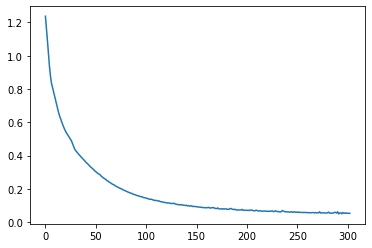

In [17]:
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.savefig("./Plot_of_loss_values.png")
plt.show()